# Beijing Air Quality Forecasting Starter Notebook

In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [ ]:
# # Mount Google Drive to access datasets
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [ ]:
train

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
30671,30672,1.467633,0.946961,-2.088668,-0.415099,-0.069353,2.687490,2013-07-01 23:00:00,-0.690542,-0.732019,-0.522096,50.0
30672,30673,1.329064,0.864984,-2.186052,-0.379306,-0.069353,3.393779,2013-07-02 00:00:00,1.448138,-0.732019,-0.522096,41.0
30673,30674,1.259780,0.701029,-2.088668,-0.263130,-0.069353,4.100068,2013-07-02 01:00:00,1.448138,-0.732019,-0.522096,32.0
30674,30675,1.190496,0.701029,-2.088668,-0.146953,-0.069353,4.806358,2013-07-02 02:00:00,1.448138,-0.732019,-0.522096,19.0


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [ ]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [ ]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [ ]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


In [ ]:
train

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
datetime,,,,,,,,,,,
2010-01-01 00:00:00,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 01:00:00,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 02:00:00,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 03:00:00,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
2010-01-01 04:00:00,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2013-07-01 23:00:00,30672,1.467633,0.946961,-2.088668,-0.415099,-0.069353,2.687490,-0.690542,-0.732019,-0.522096,50.0
2013-07-02 00:00:00,30673,1.329064,0.864984,-2.186052,-0.379306,-0.069353,3.393779,1.448138,-0.732019,-0.522096,41.0
2013-07-02 01:00:00,30674,1.259780,0.701029,-2.088668,-0.263130,-0.069353,4.100068,1.448138,-0.732019,-0.522096,32.0


# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [ ]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [ ]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [ ]:
X_train

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2010-01-01 00:00:00,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 01:00:00,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 02:00:00,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 03:00:00,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 04:00:00,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
...,...,...,...,...,...,...,...,...,...
2013-07-01 23:00:00,1.467633,0.946961,-2.088668,-0.415099,-0.069353,2.687490,-0.690542,-0.732019,-0.522096
2013-07-02 00:00:00,1.329064,0.864984,-2.186052,-0.379306,-0.069353,3.393779,1.448138,-0.732019,-0.522096
2013-07-02 01:00:00,1.259780,0.701029,-2.088668,-0.263130,-0.069353,4.100068,1.448138,-0.732019,-0.522096


In [ ]:
# Reshape data for LSTM input
# LSTM expects input in shape (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=1)  # Adds a timesteps dimension

# Convert to numpy array (if not already)
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train

# Verify the shape
print("New shape of X_train:", X_train.shape)  # Should be (samples, 1, features)


In [ ]:
X_train

array([[[-1.58087789, -1.92225045,  0.44332765, ...,  1.44813759,
         -0.7320191 , -0.52209647]],

       [[-1.58087789, -2.00422792,  0.3459432 , ...,  1.44813759,
         -0.7320191 , -0.52209647]],

       [[-1.58087789, -1.92225045,  0.24855876, ...,  1.44813759,
         -0.7320191 , -0.52209647]],

       ...,

       [[ 1.25978013,  0.70102858, -2.08866782, ...,  1.44813759,
         -0.7320191 , -0.52209647]],

       [[ 1.19049578,  0.70102858, -2.08866782, ...,  1.44813759,
         -0.7320191 , -0.52209647]],

       [[ 1.19049578,  0.70102858, -2.18605226, ...,  1.44813759,
         -0.7320191 , -0.52209647]]])

# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define RMSE as a custom loss function
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

model = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(16, activation='relu'),  # Add a dense layer for simple feature extraction
    Dense(1)  # Final output layer
])

model.compile(
    optimizer='adam',
    loss=rmse_loss,
    metrics=[rmse_loss]
)

# Train model
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,921 (23.13 KB)

 Trainable params: 5,921 (23.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 113.7484 - rmse_loss: 113.7484
Epoch 2/40
 66/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 74.6733 - rmse_loss: 74.6733

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,rmse_loss
  current = self.get_monitor_value(logs)


959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 75.1665 - rmse_loss: 75.1665
Epoch 3/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 72.0083 - rmse_loss: 72.0083
Epoch 4/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 70.8479 - rmse_loss: 70.8479
Epoch 5/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 70.5322 - rmse_loss: 70.5322
Epoch 6/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 71.4411 - rmse_loss: 71.4411
Epoch 7/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 71.0436 - rmse_loss: 71.0436
Epoch 8/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 69.8176 - rmse_loss: 69.8176
Epoch 9/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 69.6657 - rmse_loss: 69.6657
Epoch 10/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 70.5419 - rmse_loss: 70.5419
Epoch 11/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 69.3410 - rmse_loss: 69.3410
Epoch 12/40
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 70.2650 - rmse_loss: 70.2650
Epoch 13/40
959/959 ━━━━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


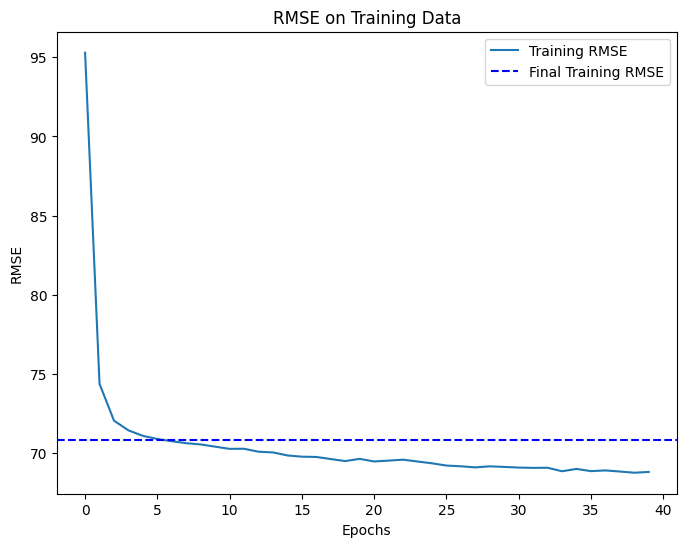

Final Training RMSE: 70.81496160248099


In [ ]:
# Calculate training RMSE
train_predictions = model.predict(X_train)
train_rmse = np.sqrt(np.mean((y_train - train_predictions.flatten())**2))

# Plot training RMSE
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training RMSE')  # Training RMSE during epochs
plt.axhline(y=train_rmse, color='blue', linestyle='--', label='Final Training RMSE')  # Final training RMSE
plt.title('RMSE on Training Data')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

print(f"Final Training RMSE: {train_rmse}")

In [ ]:
# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('subm_fixed.csv', index=False)

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
